Takudzwa Tarutira Homework 1 Notebook

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
# import ace_tools as tools
import pandas as pd
import numpy as np 

# Load data
warren_df = pd.read_csv("Warren_county_synthetic_data.csv")
copiah_df = pd.read_csv("Copiah_county_synthetic_data.csv")
claiborne_df = pd.read_csv("Claiborne_county_synthetic_data.csv")

# Helper to create demographic summary
def demographic_summary(df, county_name):
    summary = df.groupby(['Race', 'Gender']).size().reset_index(name='Count')
    summary['County'] = county_name
    return summary

# Generate summaries
warren_summary = demographic_summary(warren_df, "Warren")
copiah_summary = demographic_summary(copiah_df, "Copiah")
claiborne_summary = demographic_summary(claiborne_df, "Claiborne")

# Combine all summaries
demographic_data = pd.concat([warren_summary, copiah_summary, claiborne_summary], ignore_index=True)

# Display table to user
# tools.display_dataframe_to_user(name="Demographic Summary by Race and Gender", dataframe=demographic_data)
demographic_data

,Race,Gender,Count,County
0,Black,Female,246,Warren
1,Black,Male,218,Warren
2,Other,Female,17,Warren
3,Other,Male,23,Warren
4,White,Female,241,Warren
5,White,Male,255,Warren
6,Black,Female,187,Copiah
7,Black,Male,194,Copiah
8,Other,Female,14,Copiah
9,Other,Male,10,Copiah


In [5]:
warren_df

,County,Race,Age,Gender,Education Level,Employment Status,Income Level,Prior Convictions,Risk Score,Judge Decision,Re-offense
0,Warren County,White,18,Male,High School,Unemployed,34165.969893,1,3.899632,1,0
1,Warren County,Black,37,Male,High School,Employed,34114.425797,2,7.631000,0,0
2,Warren County,White,49,Male,Less than High School,Unemployed,36421.891032,0,6.278393,0,0
3,Warren County,White,33,Female,Less than High School,Employed,121869.327498,1,1.019732,1,0
4,Warren County,Black,19,Male,Bachelor's Degree,Employed,73289.622946,1,5.587222,0,0
...,...,...,...,...,...,...,...,...,...,...,...
995,Warren County,Black,18,Female,Less than High School,Unemployed,77739.718192,0,4.591582,0,0
996,Warren County,Black,41,Male,High School,Employed,120715.915102,1,6.500776,1,0
997,Warren County,White,30,Male,High School,Employed,14714.681789,0,3.709455,1,1
998,Warren County,White,20,Female,High School,Employed,34265.159362,0,4.360190,1,0


In [7]:
def plot_demographics(df, county_name):
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f"{county_name} County - Demographic Distributions", fontsize=16)

    # Race Distribution
    race_counts = df['Race'].value_counts()
    axs[0].pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=90)
    axs[0].set_title('Race Distribution')

    # Gender Distribution
    gender_counts = df['Gender'].value_counts()
    axs[1].bar(gender_counts.index, gender_counts.values, color='skyblue')
    axs[1].set_title('Gender Distribution')
    axs[1].set_ylabel('Count')

    # Education Level Distribution
    edu_counts = df['Education Level'].value_counts()
    axs[2].barh(edu_counts.index, edu_counts.values, color='lightgreen')
    axs[2].set_title('Education Level Distribution')
    axs[2].set_xlabel('Count')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


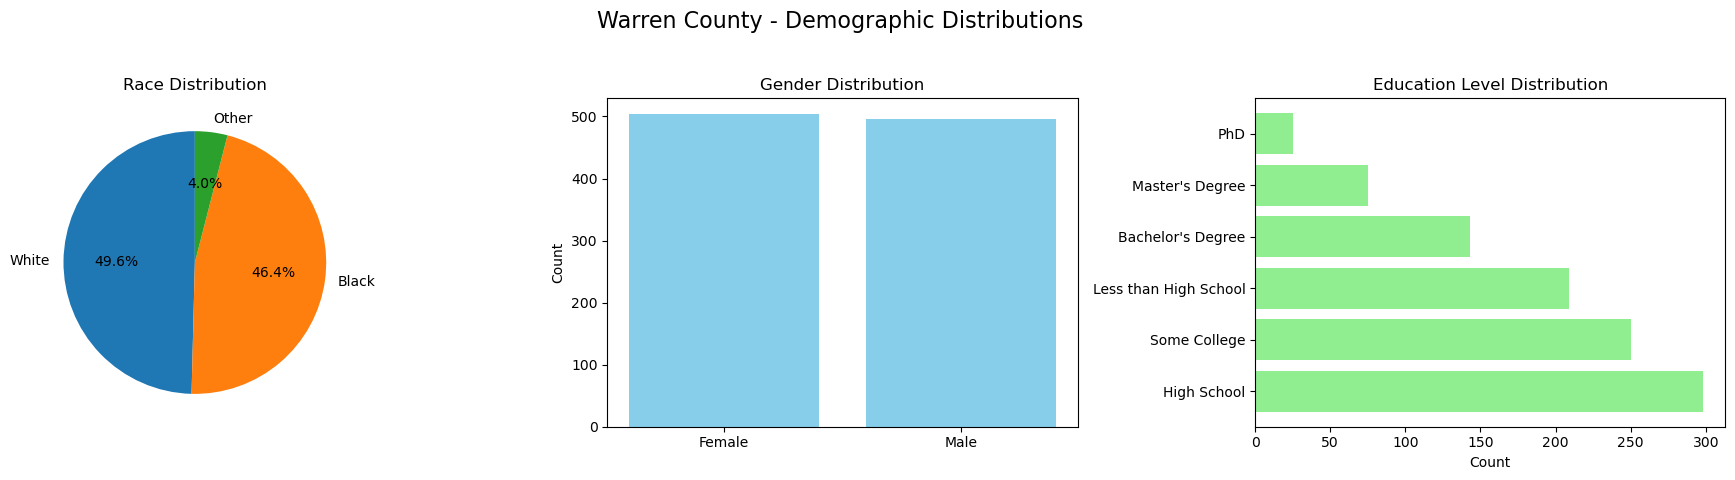

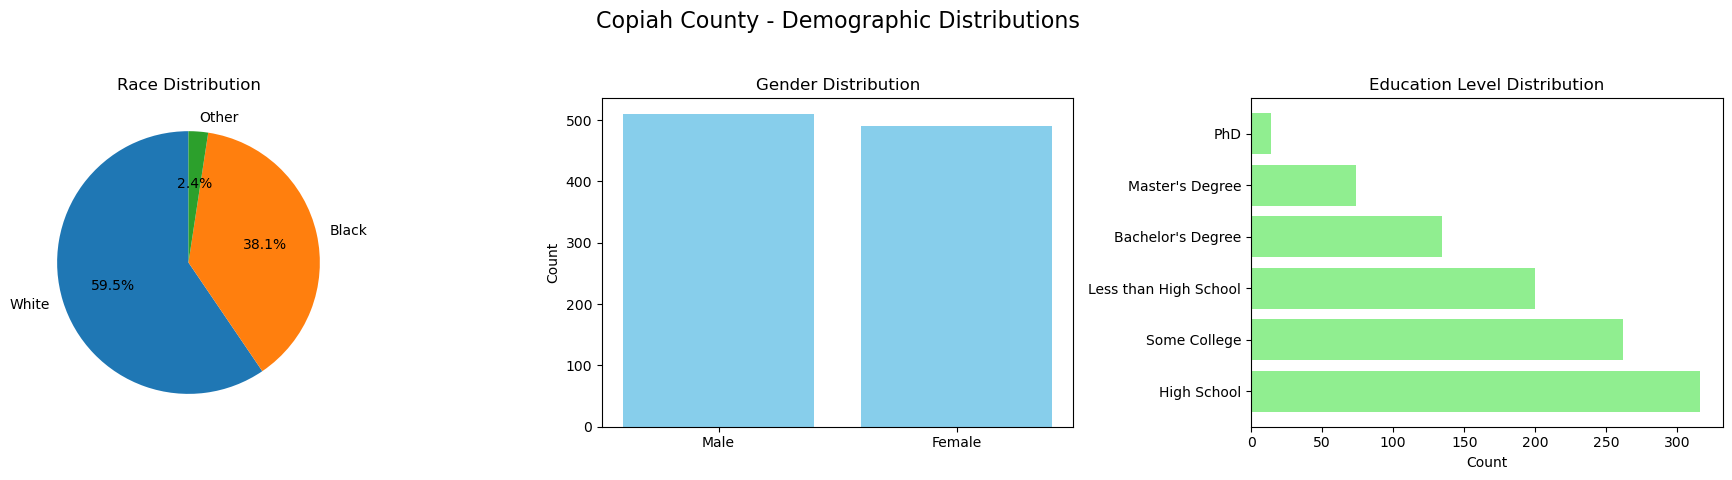

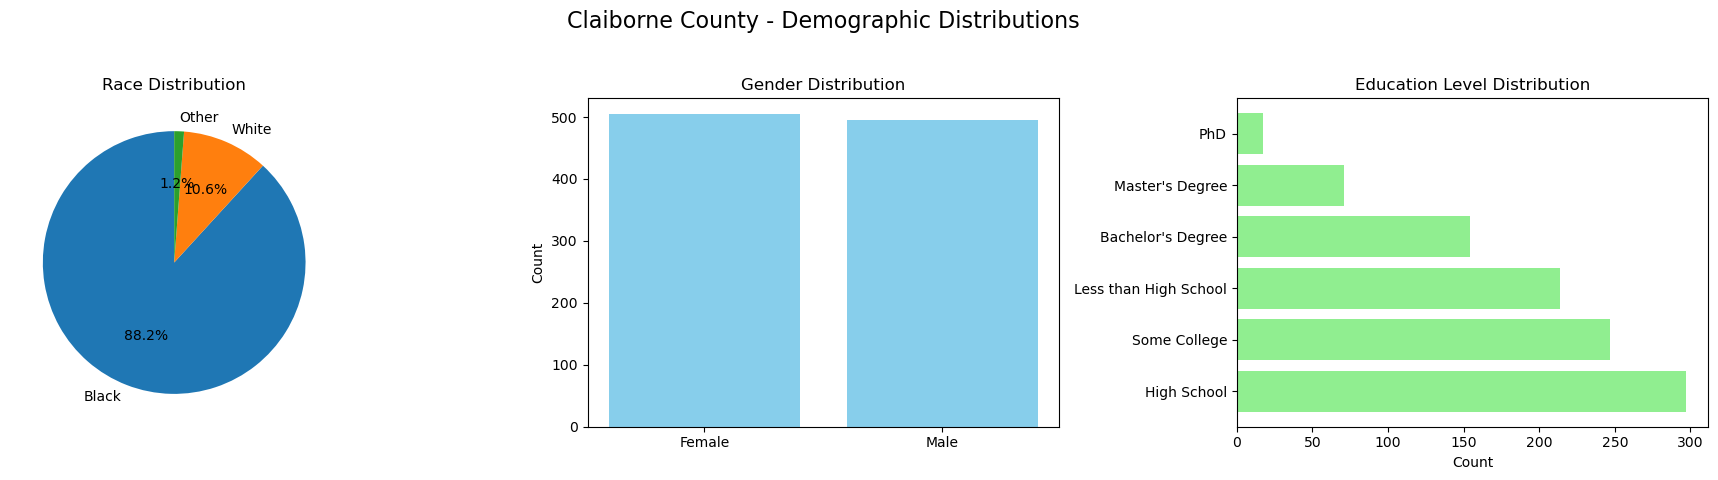

In [ ]:
# # Generate plots for each county
plot_demographics(warren_df, "Warren")
plot_demographics(copiah_df, "Copiah")
plot_demographics(claiborne_df, "Claiborne")


Risk summary table for Warren
    Race  Gender  Risk Score  County
0  Black  Female    5.740620  Warren
1  Black    Male    5.857595  Warren
2  Other  Female    4.824229  Warren
3  Other    Male    4.532994  Warren
4  White  Female    4.797872  Warren
5  White    Male    4.951137  Warren


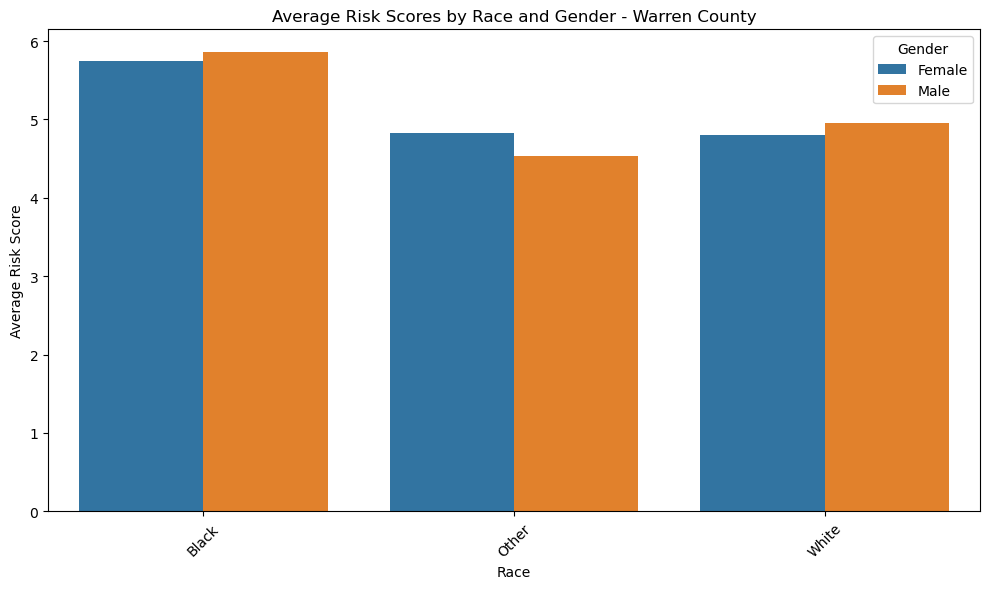

Risk summary table for Copiah
    Race  Gender  Risk Score  County
0  Black  Female    5.733967  Copiah
1  Black    Male    5.954553  Copiah
2  Other  Female    5.194471  Copiah
3  Other    Male    3.616277  Copiah
4  White  Female    4.813160  Copiah
5  White    Male    4.825751  Copiah


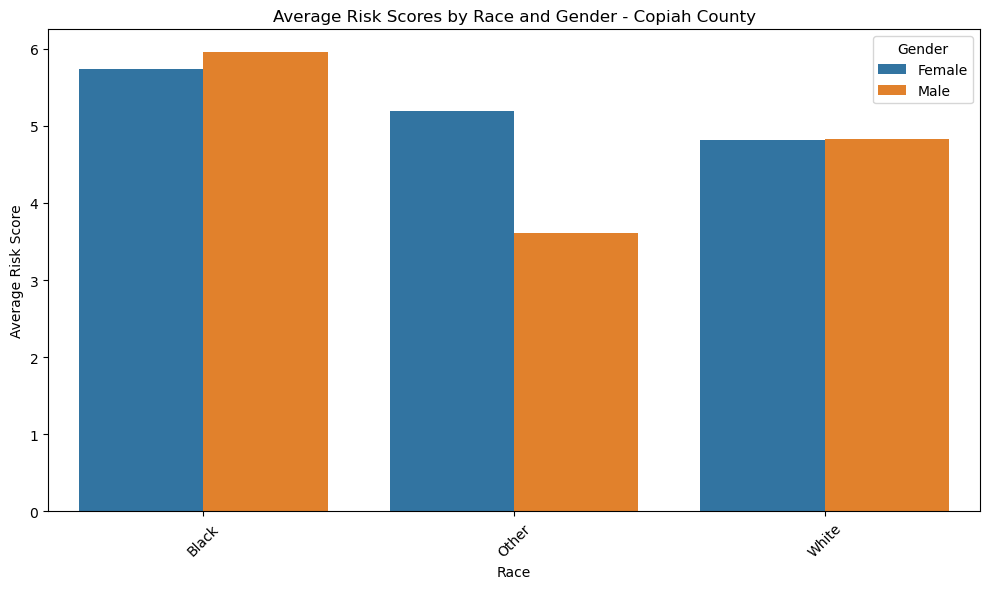

Risk summary table for Claiborne
    Race  Gender  Risk Score     County
0  Black  Female    5.952361  Claiborne
1  Black    Male    5.868757  Claiborne
2  Other  Female    4.859547  Claiborne
3  Other    Male    5.216301  Claiborne
4  White  Female    4.363324  Claiborne
5  White    Male    4.650697  Claiborne


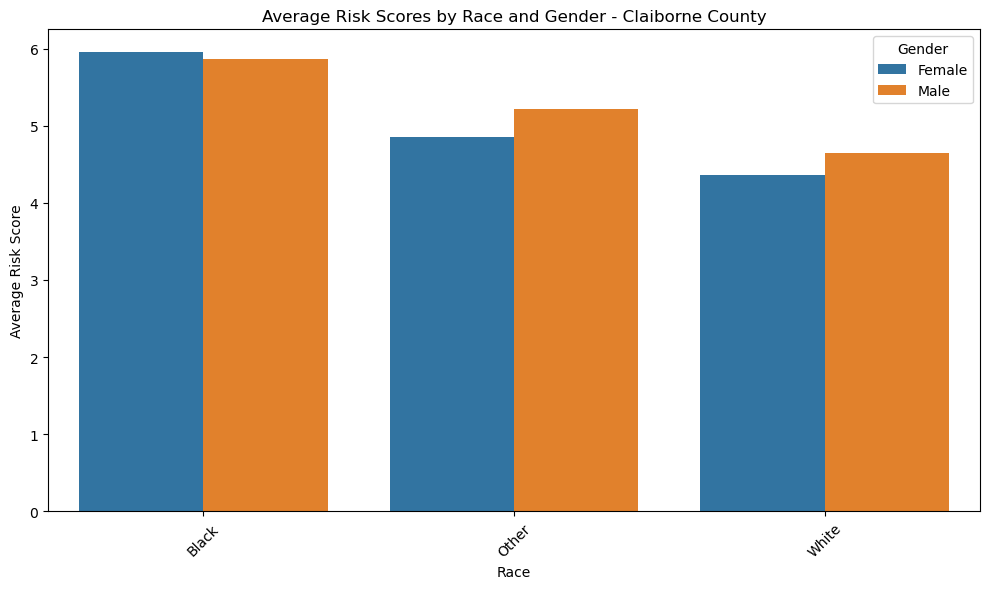

In [ ]:
# Task 2: Analyze Risk Scores by Race and Gender

# Function to compute and visualize average risk scores by race and gender for a county
def analyze_risk_scores(df, county_name):
    # Group by race and gender, then calculate mean risk score
    risk_summary = df.groupby(['Race', 'Gender'])['Risk Score'].mean().reset_index()
    
    risk_summary['County'] = county_name
    print(f'Risk summary table for {county_name}')
    print(risk_summary)
    # Display the risk summary table to the user
    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(data=risk_summary, x='Race', y='Risk Score', hue='Gender')
    plt.title(f'Average Risk Scores by Race and Gender - {county_name} County')
    plt.ylabel('Average Risk Score')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return risk_summary

# Run the analysis for each county
warren_risk = analyze_risk_scores(warren_df, "Warren")
copiah_risk = analyze_risk_scores(copiah_df, "Copiah")
claiborne_risk = analyze_risk_scores(claiborne_df, "Claiborne")

# Combine into one DataFrame
combined_risk_scores = pd.concat([warren_risk, copiah_risk, claiborne_risk], ignore_index=True)


<Figure size 1200x600 with 0 Axes>

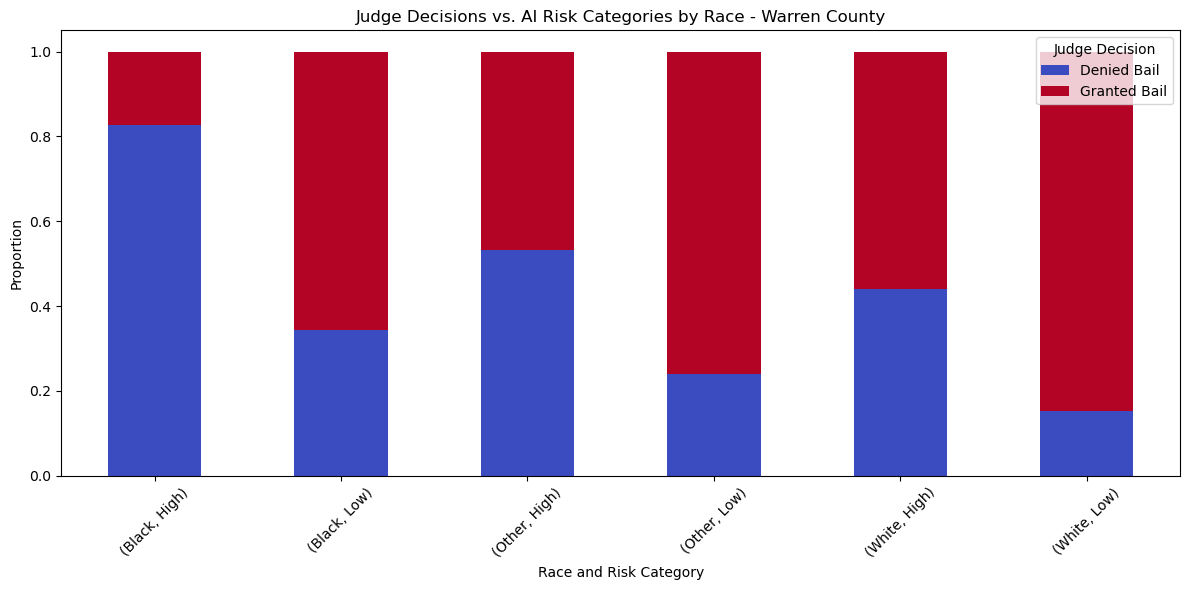

<Figure size 1200x600 with 0 Axes>

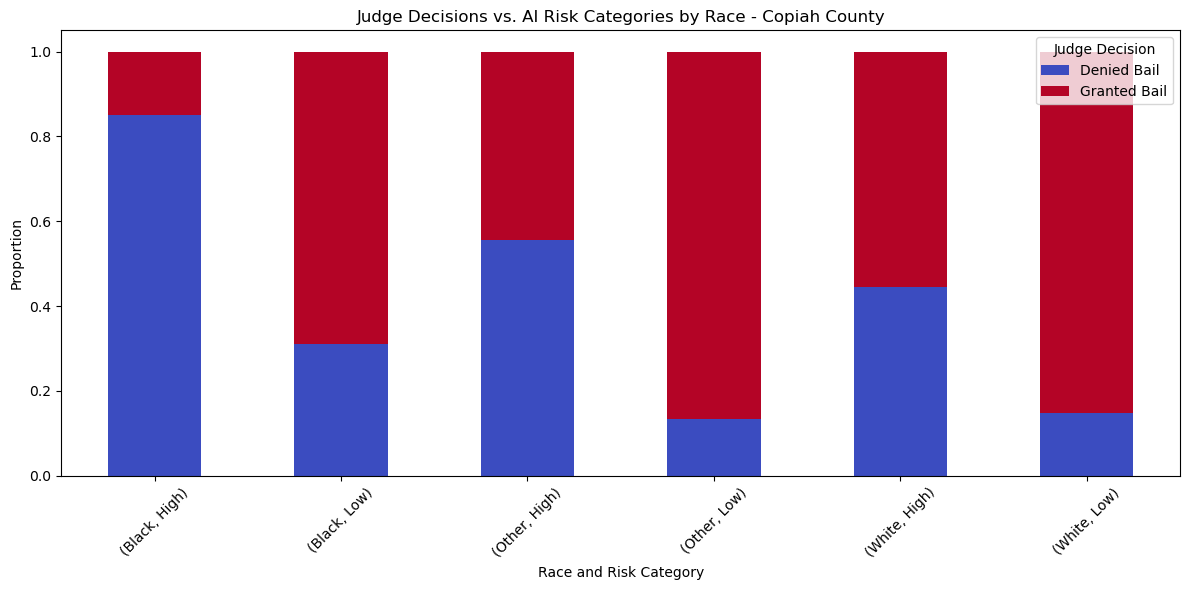

<Figure size 1200x600 with 0 Axes>

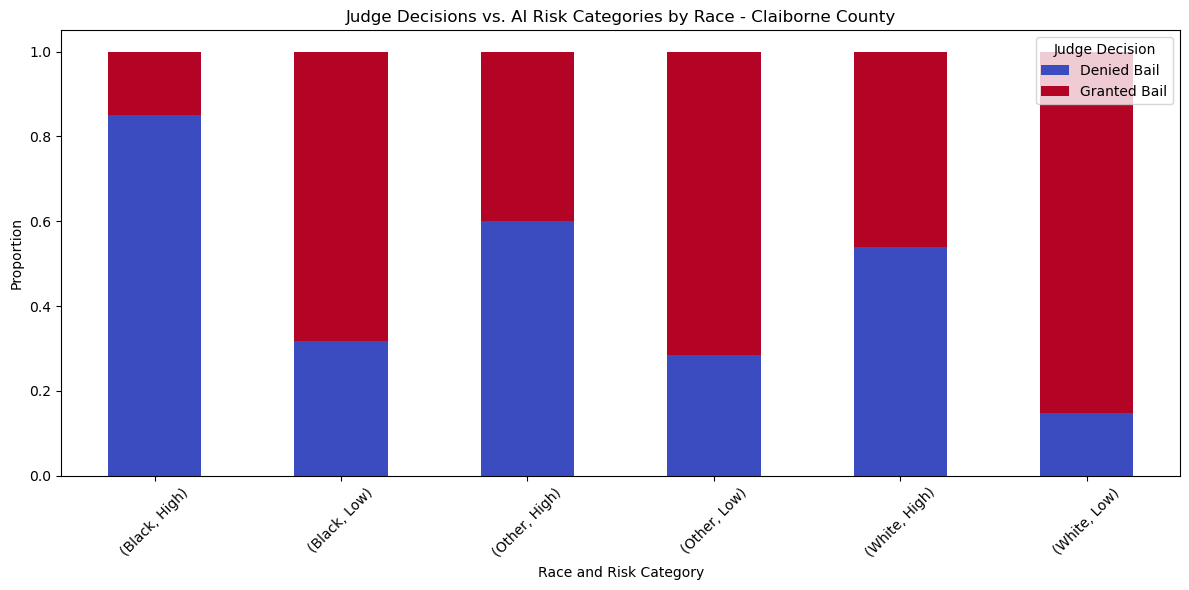

In [ ]:
# Categorize risk scores
def categorize_risk(score):
    if score < 5:
        return "Low"
    # elif score < 7:
        # return "Medium"
    else:
        return "High"

# Add categorized risk and judge decision labels
for df in [warren_df, copiah_df, claiborne_df]:
    df["Risk Category"] = df["Risk Score"].apply(categorize_risk)
    df["Judge Decision Label"] = df["Judge Decision"].map({0: "Denied Bail", 1: "Granted Bail"})

# Function to visualize judge decisions by risk and race
def judge_vs_ai_plot(df, county_name):

    plt.figure(figsize=(12, 6))
    crosstab = pd.crosstab([df['Race'], df['Risk Category']], df['Judge Decision Label'], normalize='index')
    crosstab.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(12,6))
    plt.title(f"Judge Decisions vs. AI Risk Categories by Race - {county_name} County")
    plt.ylabel("Proportion")
    plt.xlabel("Race and Risk Category")
    plt.xticks(rotation=45)
    plt.legend(title="Judge Decision")
    plt.tight_layout()
    plt.show()

# Generate the visualizations
judge_vs_ai_plot(warren_df, "Warren")
judge_vs_ai_plot(copiah_df, "Copiah")
judge_vs_ai_plot(claiborne_df, "Claiborne")


In [15]:
# Fairness metric function
def compute_fairness_metrics(df, county_name):
    metrics = []

    for race in df['Race'].unique():
        subset = df[df['Race'] == race]
        predicted_positive = subset['Risk Score'] >= 5 # Assuming a threshold of 5 for risk score
        actual_positive = subset['Re-offense'] == 1
        
        TP = ((predicted_positive) & (actual_positive)).sum()
        FP = ((predicted_positive) & (~actual_positive)).sum()
        FN = ((~predicted_positive) & (actual_positive)).sum()
        TN = ((~predicted_positive) & (~actual_positive)).sum()

        FPR = FP / (FP + TN) if (FP + TN) > 0 else 0
        FNR = FN / (FN + TP) if (FN + TP) > 0 else 0
        reoffense_rate = actual_positive.mean()

        metrics.append({
            'County': county_name,
            'Race': race,
            'FPR': round(FPR, 3),
            'FNR': round(FNR, 3),
            'Re-offense Rate': round(reoffense_rate, 3)
        })
    
    return pd.DataFrame(metrics)

# Then generate the fairness_df
warren_metrics = compute_fairness_metrics(warren_df, "Warren")
copiah_metrics = compute_fairness_metrics(copiah_df, "Copiah")
claiborne_metrics = compute_fairness_metrics(claiborne_df, "Claiborne")

fairness_df = pd.concat([warren_metrics, copiah_metrics, claiborne_metrics], ignore_index=True)


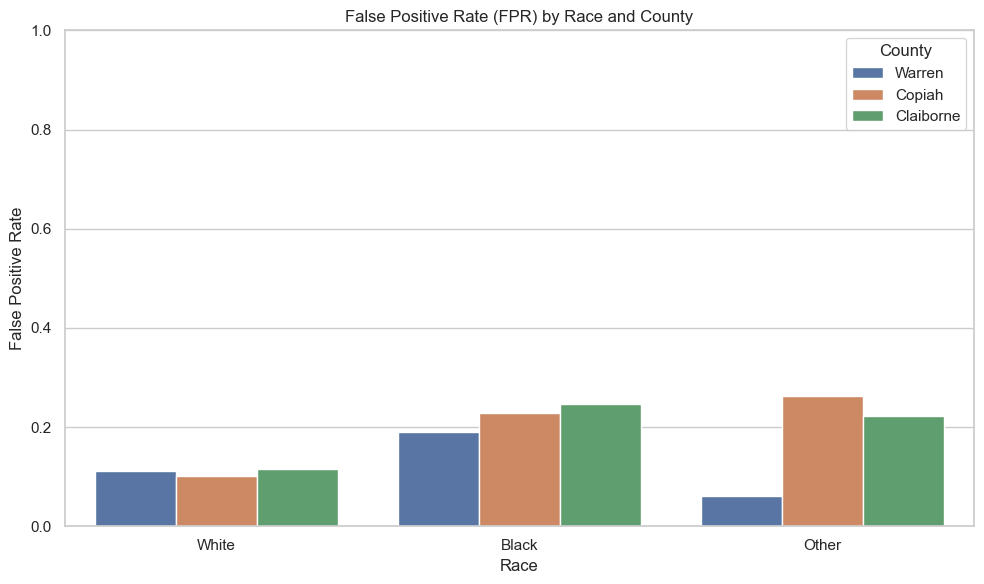

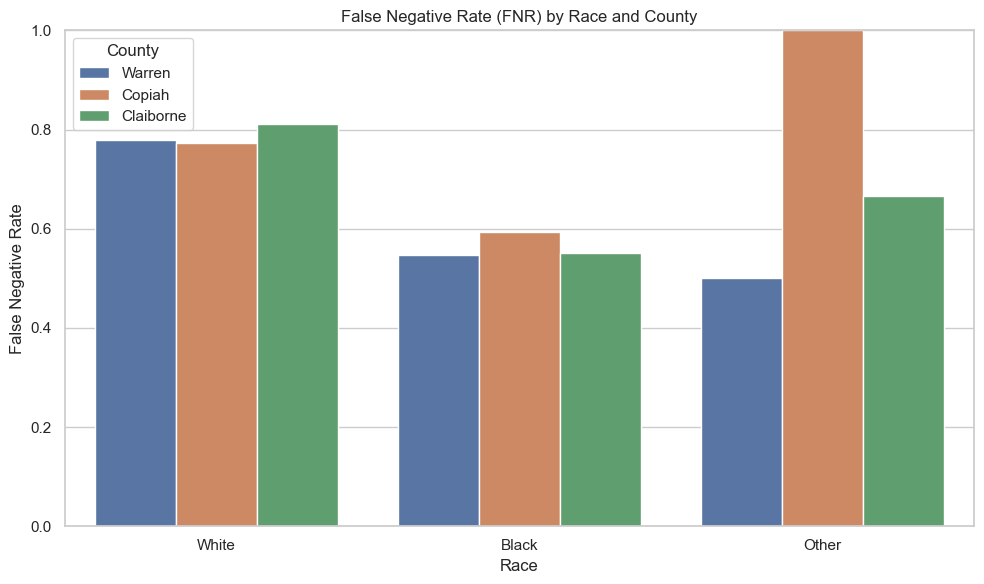

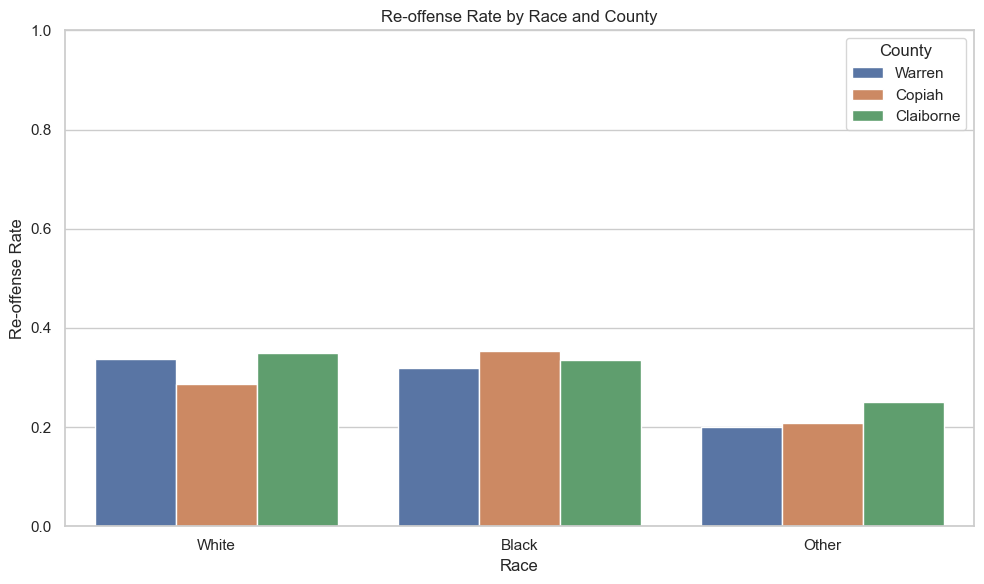

In [ ]:
# Display the fairness metrics DataFrame to the user
# Set plot theme
sns.set(style="whitegrid")

# Function to plot fairness metrics
def plot_fairness_metric(df, metric, title, ylabel):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x="Race", y=metric, hue="County")
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel("Race")
    plt.ylim(0, 1)
    plt.legend(title="County")
    plt.tight_layout()
    plt.show()

# Plot FPR, FNR, and Re-offense Rate
plot_fairness_metric(fairness_df, "FPR", "False Positive Rate (FPR) by Race and County", "False Positive Rate")
plot_fairness_metric(fairness_df, "FNR", "False Negative Rate (FNR) by Race and County", "False Negative Rate")
plot_fairness_metric(fairness_df, "Re-offense Rate", "Re-offense Rate by Race and County", "Re-offense Rate")
